## Overview of Project

**Objective:** Utilizing customer data including age, education, income, marital status, and spending habits to enhance understanding of the company's customer base through clustering algorithms, thereby enabling targeted marketing strategies.

**Outline:**

1. [Import Packages](#1.-Import-Packages)
2. [Load Data](#2.-Load-Data)
3. [Data Cleaning](#3.-Data-Cleaning)
4. [EDA](#4.-EDA)
5. [Feature Engineering](#5.-Feature-Engineering)
6. [Pre-processing](#6.-Pre-processing)
7. [Modeling](#7.-Modeling)
8. [Summary](#8.-Summary-of-results)

**Data:**
Used this [Kaggle dataset](https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis/data)

**Data Cleaning:**

1. Examined feature distributions.
2. Removed outliers where income was over 600,000 per year.
   
**EDA:**

1. Utilized heatmap for feature correlation analysis
2. Explored different relationships in data
   a.  Plotted boxplots and barplots using the two features: education and income.

**Feature Engineering:** Introduced new columns and conducted deeper exploratory analysis.
1. Developed a cumulative spending column for each customer over the past two years.
   a. Utilized scatterplots to investigate the relationship between income and total spending, indicating a potential predictive trend.
   b. Employed boxplots to examine the distribution of total spending across different education levels.
   c. Utilized KDE plots to visualize the distribution of total spending for each customer.
2. Established an age column for each customer.
   a. Filtered out entries with ages exceeding 110 years.

**Pre-processing:**
1. Encoding two categorical features: Education and Marital_Status
2. Standardized data using StandardScaler
3. Implemented PCA for dimensionality reduction

**Modeling:**
1. Employed k-means and DBSCAN clustering algorithms
2. Evaluated models:
    a. Elbow method for kmeans to determine the number of clusters.
    b. Silhoutee method to see how tight the clusters are.
    c. Calinski-Harabasz Index to see what?

**Results:**
Best number of clusters for K-means was 3. The evaulation metric for this were: 
K-means Silhouette Score: 0.36144711750603886
K-means Calinski-Harabasz Index: 2845.151324067228

Optimal K-means clustering identified 3 clusters. The evaluation metrics for k-means:
Silhouette Score: 0.3614
Calinski-Harabasz Index: 2845.15

K-means demonstrated superior cluster cohesion and separation compared to DBSCAN. Visualization of clusters confirmed the effectiveness of K-means over DBSCAN, which struggled to produce distinct groups despite parameter adjustments.


## 1. Import Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score, calinski_harabasz_score

## 2. Load Data

In [2]:
data = pd.read_csv('../src/marketing_campaign.csv', delimiter = '\t')

In [3]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


## 3. Data Cleaning

In [4]:
print(data.describe())
print(data.dtypes)

                 ID   Year_Birth         Income      Kidhome     Teenhome  \
count   2240.000000  2240.000000    2216.000000  2240.000000  2240.000000   
mean    5592.159821  1968.805804   52247.251354     0.444196     0.506250   
std     3246.662198    11.984069   25173.076661     0.538398     0.544538   
min        0.000000  1893.000000    1730.000000     0.000000     0.000000   
25%     2828.250000  1959.000000   35303.000000     0.000000     0.000000   
50%     5458.500000  1970.000000   51381.500000     0.000000     0.000000   
75%     8427.750000  1977.000000   68522.000000     1.000000     1.000000   
max    11191.000000  1996.000000  666666.000000     2.000000     2.000000   

           Recency     MntWines    MntFruits  MntMeatProducts  \
count  2240.000000  2240.000000  2240.000000      2240.000000   
mean     49.109375   303.935714    26.302232       166.950000   
std      28.962453   336.597393    39.773434       225.715373   
min       0.000000     0.000000     0.000000  

In [5]:
data.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

array([[<AxesSubplot: title={'center': 'ID'}>,
        <AxesSubplot: title={'center': 'Year_Birth'}>,
        <AxesSubplot: title={'center': 'Income'}>,
        <AxesSubplot: title={'center': 'Kidhome'}>,
        <AxesSubplot: title={'center': 'Teenhome'}>],
       [<AxesSubplot: title={'center': 'Recency'}>,
        <AxesSubplot: title={'center': 'MntWines'}>,
        <AxesSubplot: title={'center': 'MntFruits'}>,
        <AxesSubplot: title={'center': 'MntMeatProducts'}>,
        <AxesSubplot: title={'center': 'MntFishProducts'}>],
       [<AxesSubplot: title={'center': 'MntSweetProducts'}>,
        <AxesSubplot: title={'center': 'MntGoldProds'}>,
        <AxesSubplot: title={'center': 'NumDealsPurchases'}>,
        <AxesSubplot: title={'center': 'NumWebPurchases'}>,
        <AxesSubplot: title={'center': 'NumCatalogPurchases'}>],
       [<AxesSubplot: title={'center': 'NumStorePurchases'}>,
        <AxesSubplot: title={'center': 'NumWebVisitsMonth'}>,
        <AxesSubplot: title={'ce

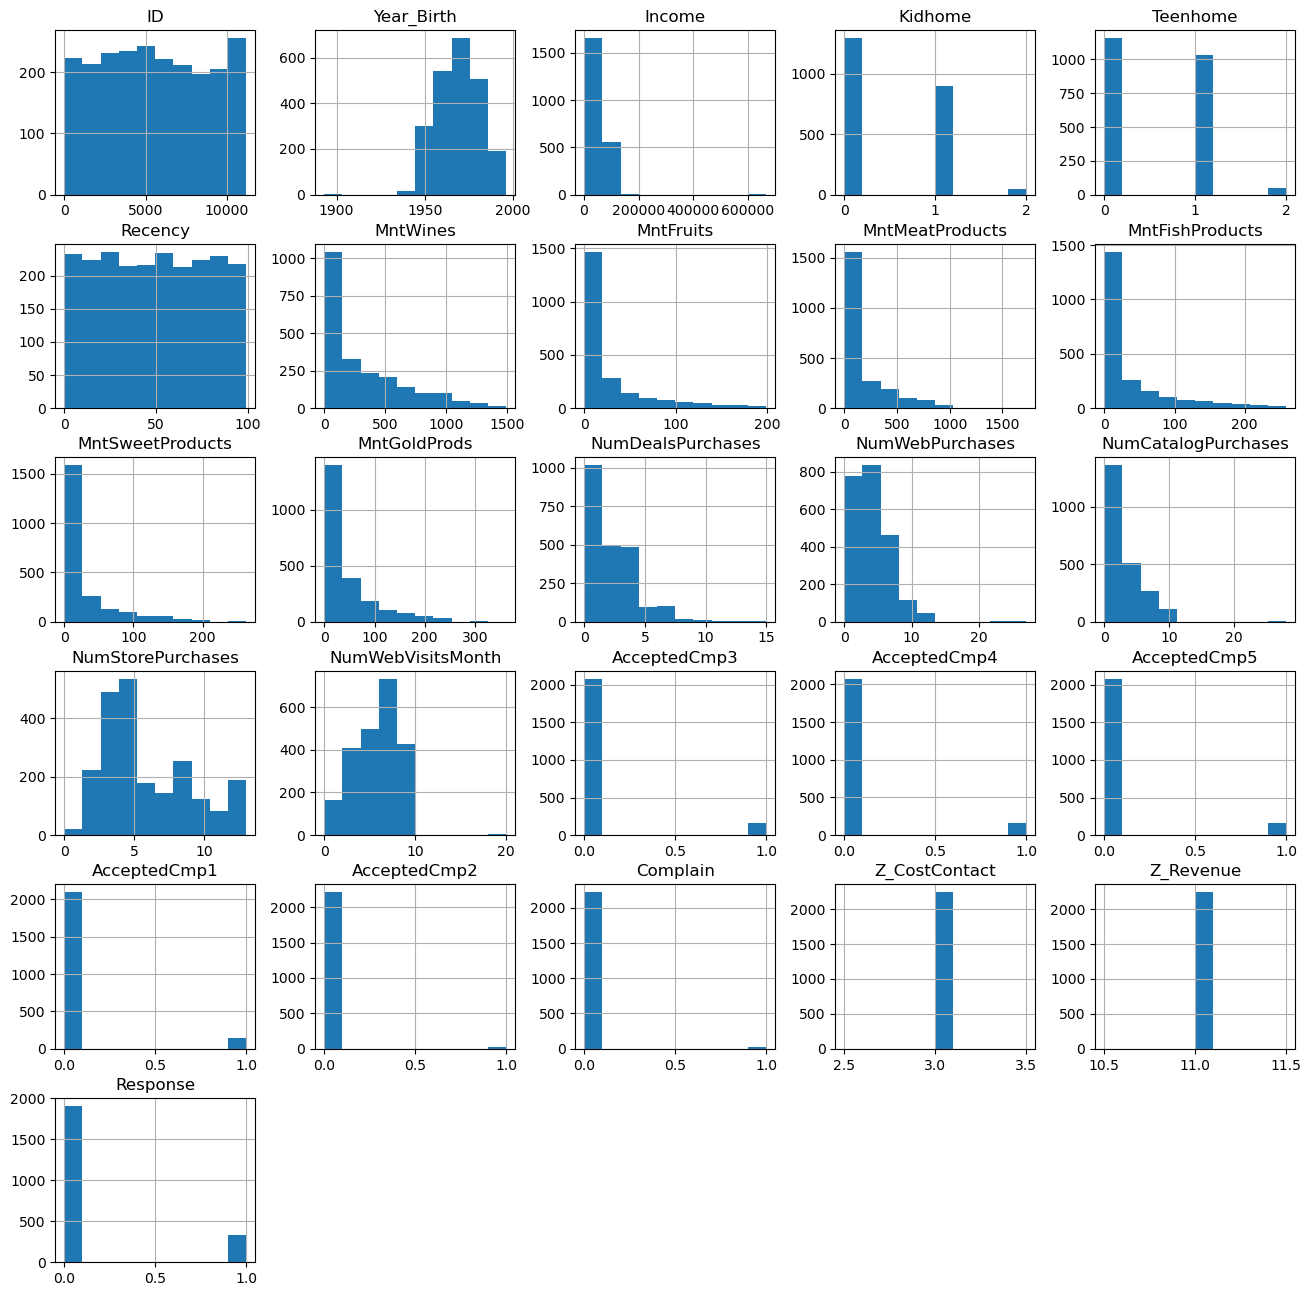

In [6]:
data.hist(figsize=(16, 16))

Remove outliers in income as can see it in the hist plot above. 

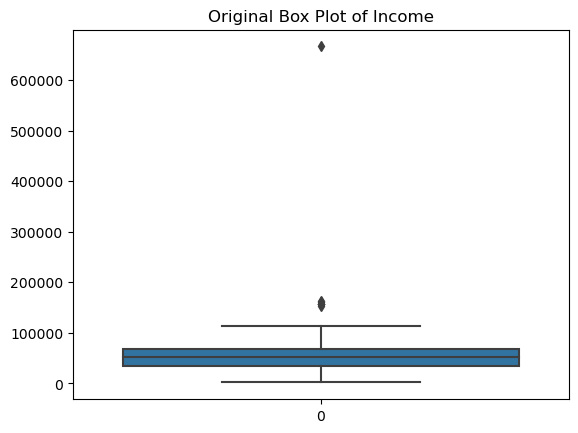

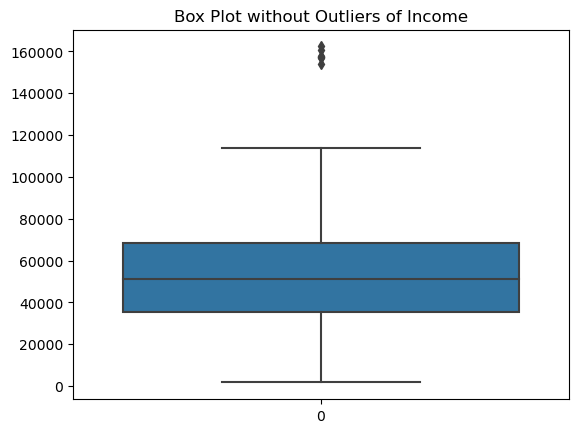

In [7]:
#copied code from: https://www.geeksforgeeks.org/detect-and-remove-the-outliers-using-python/
def removal_box_plot(df, column, threshold):
    sns.boxplot(df[column])
    plt.title(f'Original Box Plot of {column}')
    plt.show()
 
    removed_outliers = df[df[column] <= threshold]
 
    sns.boxplot(removed_outliers[column])
    plt.title(f'Box Plot without Outliers of {column}')
    plt.show()
    return removed_outliers
 
df = removal_box_plot(data, 'Income', 300000)

## 4. EDA

/var/folders/5n/xfdq9pv147x25d8d7_s4c24c0000gn/T/ipykernel_93303/2641169339.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, linewidths=.5, ax=ax)


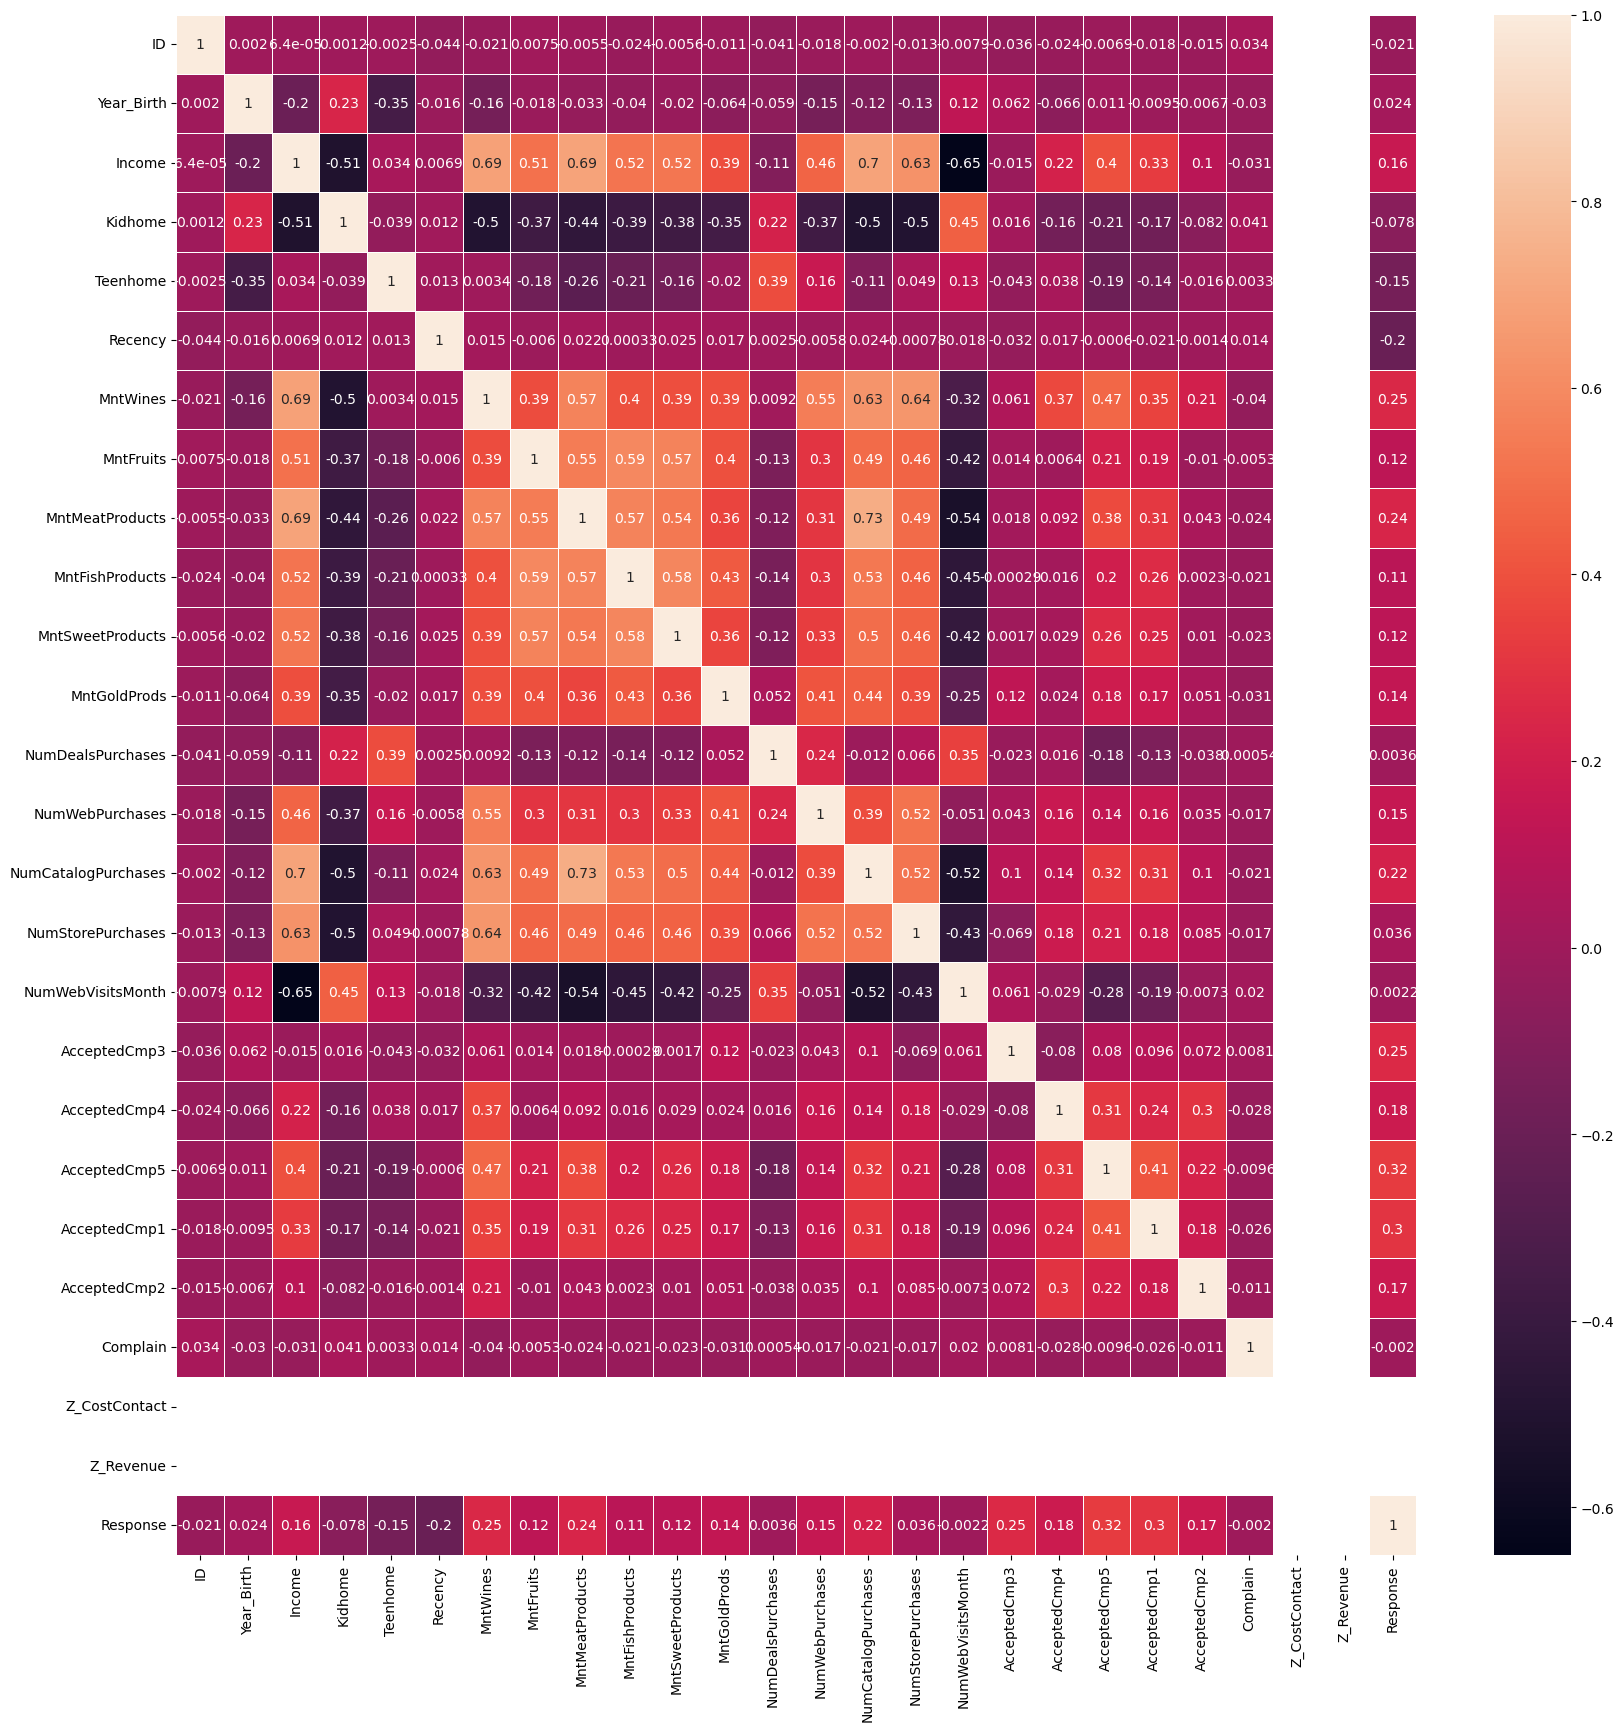

In [8]:
fig, ax = plt.subplots(figsize=(20,20))   
sns.heatmap(df.corr(), annot=True, linewidths=.5, ax=ax)

#show heatmap
plt.show()

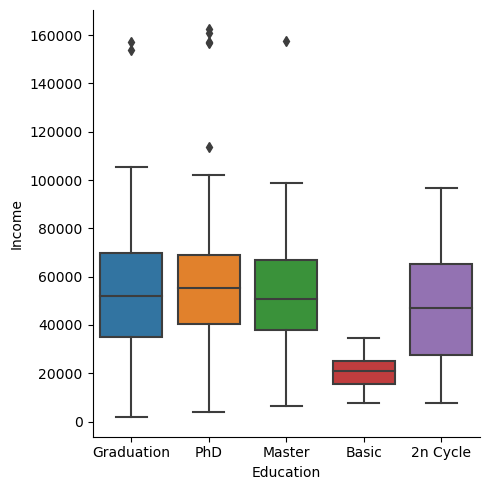

In [9]:
sns.catplot(data=df, x="Education", y="Income", kind="box")

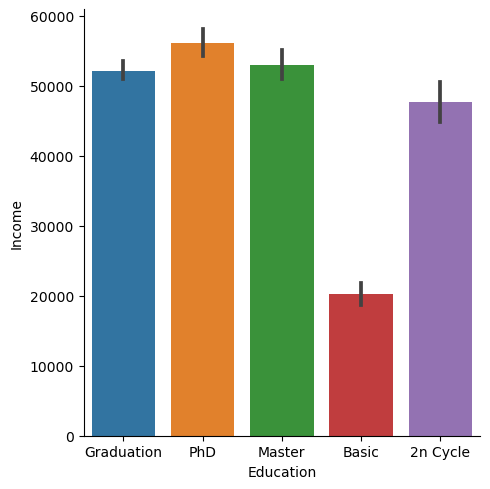

In [10]:
sns.catplot(
    data=df, x="Education", y="Income",
    kind="bar"
)

## 5. Feature Engineering

For the step:
1. Added age column
2. Adding a total amount spent per customer by adding the 6 columns together


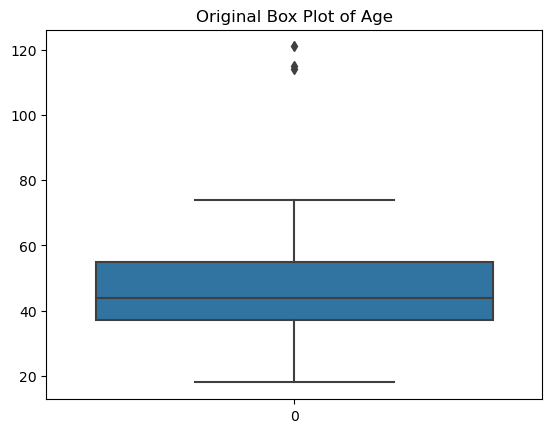

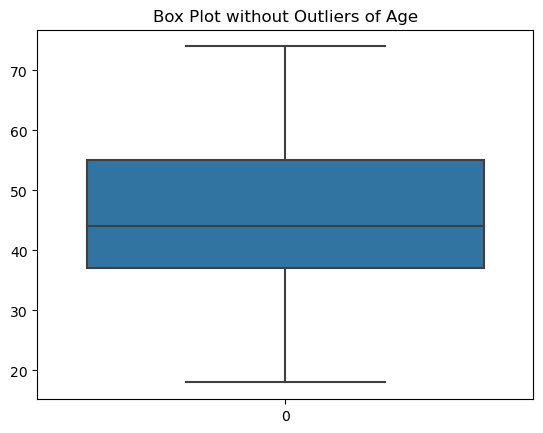

In [13]:
#df['Age'] = 2014 - df['Year_Birth']
#kept getting error so created copy

df_copy = df.copy()
df_copy['Age'] = 2014 - df_copy['Year_Birth']
df_copy.isna().sum()

#remove those who that show to be older than 110 years old
df_copy = removal_box_plot(df_copy, 'Age', 110)

In [14]:
column_names = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
df_copy['total_amount'] = df_copy[column_names].sum(axis=1)

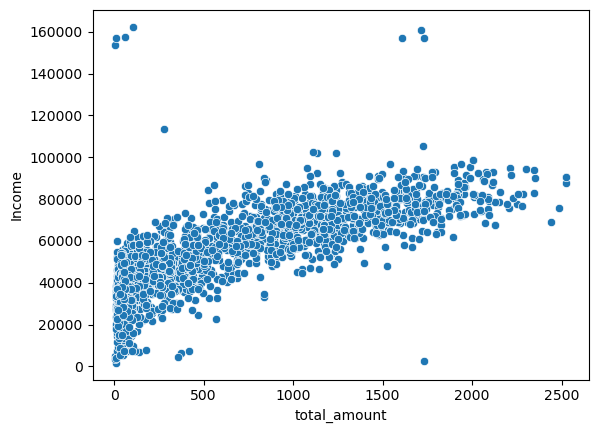

In [15]:
sns.scatterplot(y='Income', x='total_amount', data=df_copy)
plt.show()

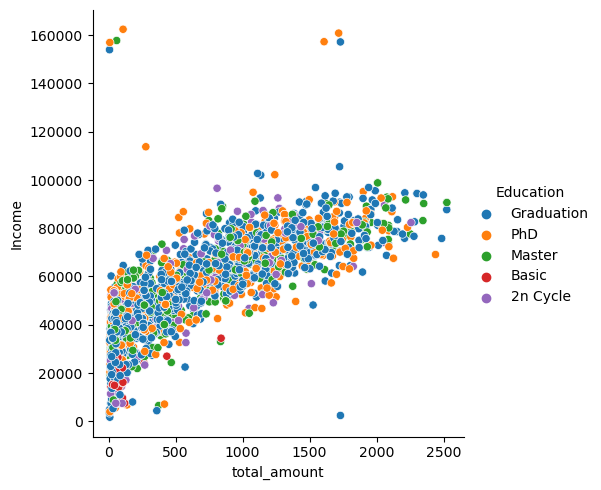

In [16]:
sns.relplot(data=df_copy, y='Income', x='total_amount', hue="Education")

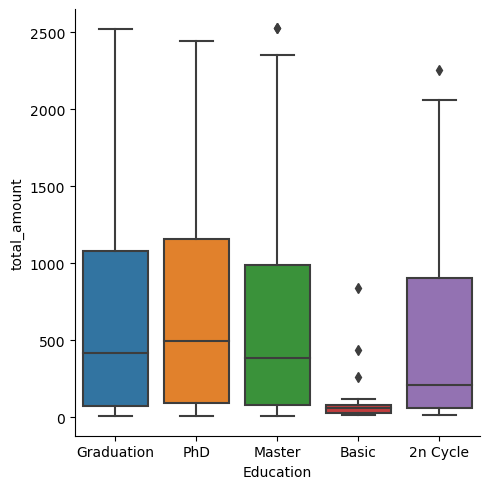

In [17]:
sns.catplot(data=df_copy, x="Education", y="total_amount", kind="box")

<AxesSubplot: xlabel='Education', ylabel='total_amount'>

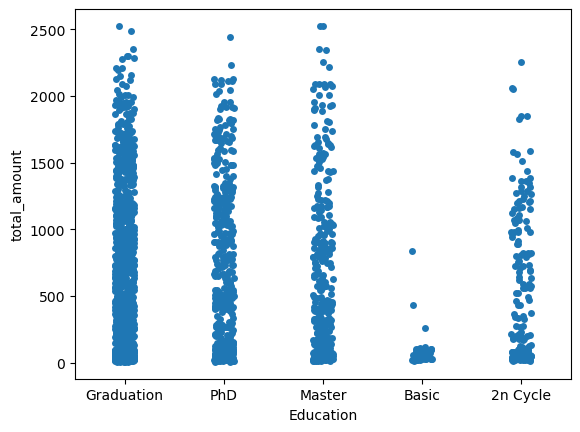

In [18]:
sns.stripplot(data=df_copy, x="Education", y="total_amount")

<AxesSubplot: xlabel='total_amount', ylabel='Density'>

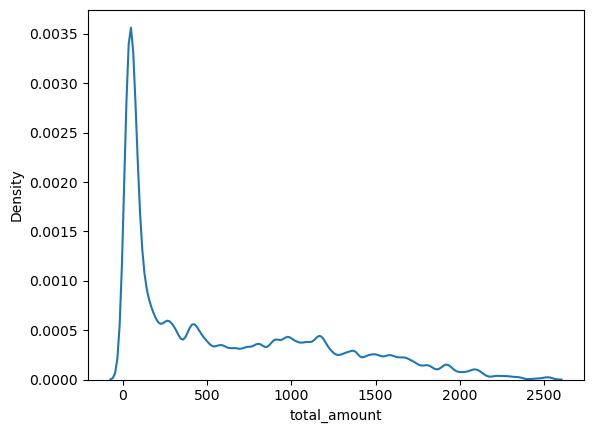

In [19]:
sns.kdeplot(data=df_copy, x="total_amount", bw_adjust=.2)

## 6. Pre-processing

For this step:
1. Encoding 'Education' and 'Marital_Status'
2. Appling StandardScalar
3. Applying PCA to reduce the number of dimensions 

In [20]:
print(df_copy.Education.value_counts())
print(df_copy.Marital_Status.value_counts())

Graduation    1115
PhD            480
Master         365
2n Cycle       198
Basic           54
Name: Education, dtype: int64
Married     857
Together    571
Single      470
Divorced    231
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64


In [21]:
df_copy['Marital_Status'] = df_copy['Marital_Status'].replace('Alone', 'Single')
df_copy = df_copy[~df_copy['Marital_Status'].isin(['Absurd', 'YOLO'])]

In [22]:
print(df_copy.Marital_Status.value_counts())

Married     857
Together    571
Single      473
Divorced    231
Widow        76
Name: Marital_Status, dtype: int64


In [23]:
df1 = pd.get_dummies(df_copy, columns = ['Education', 'Marital_Status'])

In [24]:
df1.drop(columns=['ID', 'Year_Birth', 'Dt_Customer'], inplace=True)
df1.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,1,0,0,0,0,1,0,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,1,0,0,0,0,1,0,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,0,0,1,0,0,0,0,0,1,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,0,0,1,0,0,0,0,0,1,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,1,0,1,0,0,0


In [25]:
print(df1.isna().sum())
df1.shape

Income                     0
Kidhome                    0
Teenhome                   0
Recency                    0
MntWines                   0
MntFruits                  0
MntMeatProducts            0
MntFishProducts            0
MntSweetProducts           0
MntGoldProds               0
NumDealsPurchases          0
NumWebPurchases            0
NumCatalogPurchases        0
NumStorePurchases          0
NumWebVisitsMonth          0
AcceptedCmp3               0
AcceptedCmp4               0
AcceptedCmp5               0
AcceptedCmp1               0
AcceptedCmp2               0
Complain                   0
Z_CostContact              0
Z_Revenue                  0
Response                   0
Age                        0
total_amount               0
Education_2n Cycle         0
Education_Basic            0
Education_Graduation       0
Education_Master           0
Education_PhD              0
Marital_Status_Divorced    0
Marital_Status_Married     0
Marital_Status_Single      0
Marital_Status

(2208, 36)

In [26]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df1)

pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_features)

## 7. Modeling

### 7a Kmeans

In [27]:
# Kmeans clustering
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans.fit(pca_data)

# Add the cluster labels to the dataframe
df1['Cluster'] = kmeans.labels_
print(df1.head())

    Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  MntMeatProducts  \
0  58138.0        0         0       58       635         88              546   
1  46344.0        1         1       38        11          1                6   
2  71613.0        0         0       26       426         49              127   
3  26646.0        1         0       26        11          4               20   
4  58293.0        1         0       94       173         43              118   

   MntFishProducts  MntSweetProducts  MntGoldProds  ...  Education_Basic  \
0              172                88            88  ...                0   
1                2                 1             6  ...                0   
2              111                21            42  ...                0   
3               10                 3             5  ...                0   
4               46                27            15  ...                0   

   Education_Graduation  Education_Master  Education_PhD  \
0 

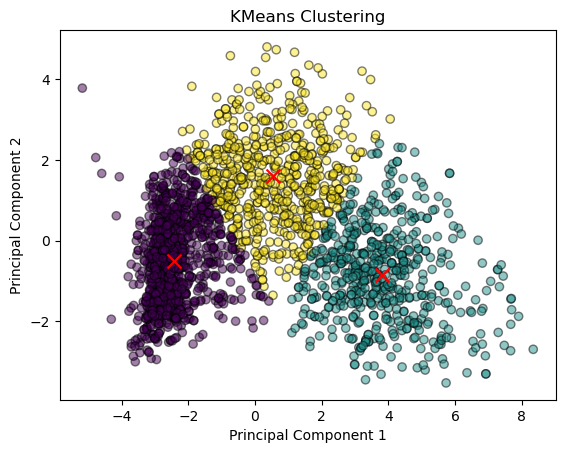

In [28]:
#plot the the first two principal components along with the clusters
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=kmeans.labels_, cmap='viridis', alpha=0.5, edgecolor='k')

# Plot the cluster centers
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='x', s=100)

plt.title('KMeans Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

Evaulating the model:
1. Elbow method to look at the ideal amount of clusters for algorithm
2. Silhoutte Method

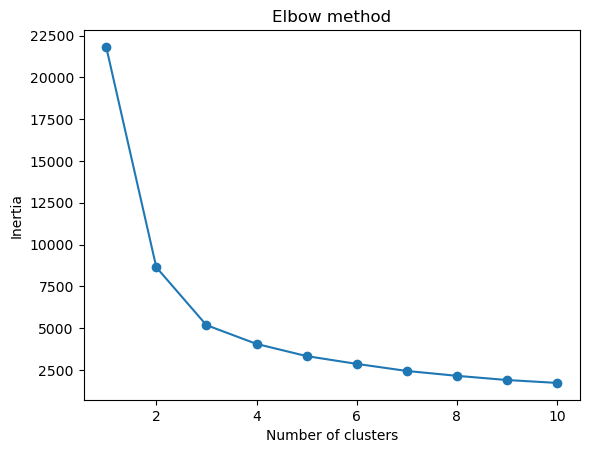

In [29]:
inertias = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(pca_data)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [30]:
from sklearn.metrics import silhouette_score

# Calculate silhouette score
silhouette_avg = silhouette_score(pca_data, kmeans.labels_)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.36144711750603886


### 7b. DBSCAN Clustering

In [31]:
eps = 0.5
min_samples = 5
dbscan = DBSCAN(eps=eps, min_samples=min_samples)

# Fit DBSCAN to the data
dbscan.fit(pca_data)

# Get cluster labels
cluster_labels = dbscan.labels_


[[  -1   30]
 [   0 2170]
 [   1    8]]


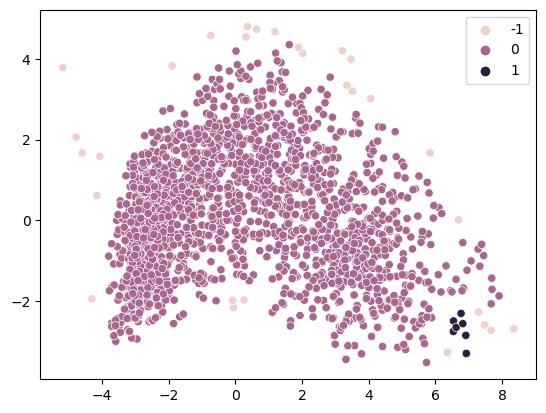

In [32]:
sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1], hue = dbscan.labels_)
unique, counts = np.unique(cluster_labels, return_counts=True)

print(np.asarray((unique, counts)).T)

### 7c Evaluating both models

In [33]:
# Compute silhouette score for DBSCAN
silhouette_dbscan = silhouette_score(pca_data, dbscan.labels_)

# Compute Calinski-Harabasz index for DBSCAN
ch_dbscan = calinski_harabasz_score(pca_data, dbscan.labels_)

# Compute silhouette score for K-means
silhouette_kmeans = silhouette_score(pca_data, kmeans.labels_)

# Compute Calinski-Harabasz index for K-means
ch_kmeans = calinski_harabasz_score(pca_data, kmeans.labels_)

print("DBSCAN Silhouette Score:", silhouette_dbscan)
print("DBSCAN Calinski-Harabasz Index:", ch_dbscan)
print("K-means Silhouette Score:", silhouette_kmeans)
print("K-means Calinski-Harabasz Index:", ch_kmeans)

DBSCAN Silhouette Score: 0.2538095846181929
DBSCAN Calinski-Harabasz Index: 30.2139181002942
K-means Silhouette Score: 0.36144711750603886
K-means Calinski-Harabasz Index: 2845.151324067228


## 8. Summary of results

Based on the the evaluation metrics, K-means clustering outperforms DBSCAN in terms of both Silhouette Score and Calinski-Harabasz Index. The K-means model achieved a Silhouette Score of 0.3614 and a Calinski-Harabasz Index of 2845.15, indicating better cluster cohesion and separation compared to DBSCAN. Additionally, visual inspection of the clustering results suggests that K-means provides clearer and more distinct clusters compared to DBSCAN. Therefore, for this particular dataset, K-means appears to be the better clustering algorithm.